Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

Version | Authors
------------ | -------------
0.2 | Dennis McNab, Benjamin Dilly, Anton Kisel


License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Adding all planners
===========


In [1]:
from IPPerfMonitor import IPPerfMonitor
import IPBasicPRM
import IPVISBasicPRM

import IPVisibilityPRM
import IPVISVisibilityPRM

import IPLazyPRM
import IPVISLazyPRM

import ResultCollection

In [2]:
import IPTestSuiteKin3DoF as ts

from shapely.geometry import Point, Polygon, LineString
from shapely import plotting

import matplotlib.pylab as plt
import matplotlib
%matplotlib inline

from IPEnvironmentKin import KinChainCollisionChecker, planarRobotVisualize, animateSolution

Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [ ]:
plannerFactory = dict()

basicConfig = dict()
basicConfig["radius"] = 3
basicConfig["numNodes"] = 200
#plannerFactory["basePRM"] = [IPBasicPRM.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]


basicConfig2 = dict()
basicConfig2["radius"] = 6
basicConfig2["numNodes"] = 600
# plannerFactory["basePRM2"] = [IPBasicPRM.BasicPRM, basicConfig2, IPVISBasicPRM.basicPRMVisualize]

basicConfig3 = dict()
basicConfig3["radius"] = 15
basicConfig3["numNodes"] = 300
#plannerFactory["basePRM3"] = [IPBasicPRM.BasicPRM, basicConfig3, IPVISBasicPRM.basicPRMVisualize]

visbilityConfig = dict()
visbilityConfig["ntry"] = 300
plannerFactory["visibilityPRM"] = [IPVisibilityPRM.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize]

lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5 
lazyConfig["kNearest"] = 8
lazyConfig["maxIterations"] = 20
# plannerFactory["lazyPRM"] = [IPLazyPRM.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

lazyConfig2 = dict()
lazyConfig2["initialRoadmapSize"] = 20
lazyConfig2["updateRoadmapSize"]  = 5 
lazyConfig2["kNearest"] = 15
lazyConfig2["maxIterations"] = 15
#plannerFactory["lazyPRM2"] = [IPLazyPRM.LazyPRM, lazyConfig2, IPVISLazyPRM.lazyPRMVisualize]


In [4]:
fullBenchList = ts.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Kin_Obst


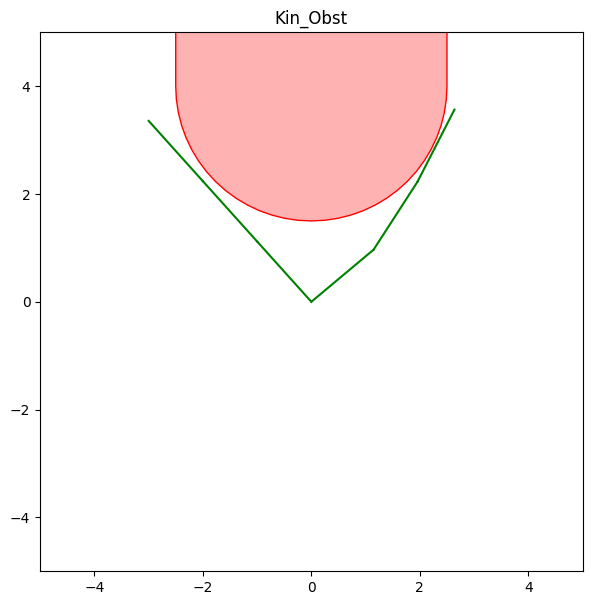

In [5]:
# start_joint_pos = [2.0, 0.5, 0.5, 0.5]
# end_joint_pos = [-2.0, -0.5, -0.5, -0.5]
start_joint_pos = [2.3, 0, 0]
end_joint_pos = [0.7, 0.3, 0.1]

for benchmark in fullBenchList:
    fig_local = plt.figure(figsize=(7,7))
    ax = fig_local.add_subplot(1,1,1)
    title = benchmark.name
    ax.set_title(title)
    ax.set_xlim([-5,5])
    ax.set_ylim([-5,5])
    try:
        benchmark.collisionChecker.drawObstacles(ax, True)
        benchmark.collisionChecker.kin_chain.move(start_joint_pos)
        planarRobotVisualize(benchmark.collisionChecker.kin_chain, ax)
        benchmark.collisionChecker.kin_chain.move(end_joint_pos)
        planarRobotVisualize(benchmark.collisionChecker.kin_chain, ax)
    except Exception as e:
       print ("Error", e)
       pass

    

In [6]:
import planning
testList = fullBenchList
resultList = planning.planning(plannerFactory, testList)

visibilityPRM [<class 'IPVisibilityPRM.VisPRM'>, {'ntry': 300}, <function visibilityPRMVisualize at 0x783fd6d97520>]
Planning: visibilityPRM - Kin_Obst


KeyboardInterrupt: 

In [ ]:
matplotlib.rcParams['animation.embed_limit'] = 256
from IPEnvironmentKin import animateSolution
for result in resultList:
    if result.solution != []:
        # Animation Planned Path
        animateSolution(result.planner, result.graph, result.benchmark.collisionChecker, result.solution, plannerFactory[result.plannerFactoryName][2])
        # Animation Smoothing with BG
        animateSolution(result.planner, result.smooth_graph_bg, result.benchmark.collisionChecker, result.smoothed_path_bg, plannerFactory[result.plannerFactoryName][2], title=f"Smooth BG Path\n [{result.plannerFactoryName}]")
        # Animation Generic Smoothing
        animateSolution(result.planner, result.smooth_graph_generic, result.benchmark.collisionChecker, result.smoothed_path_generic, plannerFactory[result.plannerFactoryName][2], title=f"Smooth Generic Path\n [{result.plannerFactoryName}]")
    else:
        print(f"{result.plannerFactoryName} {result.benchmark.name} no Path found")

In [ ]:
import diagram
diagram.generate_diagramm(testList, resultList)

In [ ]:
diagram.generate_timeplot(resultList)